**Estatística e Probabilidade Aplicada**

In [21]:
import pandas as pd #importando as bibliotecas
import numpy as np

In [22]:
from google.colab import drive #importando o drive

In [23]:
drive.mount('/content/gdrive') #autorizando o acesso ao drive e chamando o google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
from google.colab import files #comando para importar arquivos no colab
uploaded = files.upload() #comando para fazer o upload do arquivo

Saving titanic.csv to titanic (1).csv


In [25]:
titanic = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic.csv')

In [26]:
leitura = pd.read_csv('titanic.csv') #realiza a leitura do arquivo importado
leitura.head(10) #comando head serve para exibir as 5 primeiras linhas do dataframe #SibSp = sibling/spouse (irmão/cônjuge), parch = parent/child, fare = tarifa
#C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Probabilidade Simples**

Qual a probabilidade de selecionar uma pessoa e essa pessoa ser mulher?

In [27]:
probMu = len(titanic[titanic['Sex']== 'female']) / len(titanic)
print('A probabilidade de ser mulher no Titanic é igual a: '+ str(round(probMu*100,2)) + '%') #converte a variável proMU em uma string com 4 casas decimais

A probabilidade de ser mulher no Titanic é igual a: 35.24%


In [28]:
probH = len(titanic[titanic['Sex']== 'male']) / len(titanic)
print(probH)

0.6475869809203143


Comparativos: a população de mulheres em 1912 é correspondente ao do titanic?

In [29]:
#referência externa: (https://www.census.gov/data/tables/time-series/demo/popest/pre-1980-national.html)
probMu2 = round(45573000/ 93863000, 4)
print('A probabilidade de ser mulher em 1912 é de: '+ str(round(probMu2*100,6)) + '%')

A probabilidade de ser mulher em 1912 é de: 48.55%


**Probabilidade da União**

Qual a probabilidade de estar acompanhando pelo Parch ou pelo SibSp?

In [30]:
Acomp = len(titanic[(titanic['Parch']>0) | (titanic['SibSp']>0)])
probAcomp = round(Acomp/len(titanic), 4)

print('A probabilidade de estar acompanhado pelo pai ou pelo cônjuge é de : '+ str(round(probAcomp*100,4)) + '%')

A probabilidade de estar acompanhado pelo pai ou pelo cônjuge é de : 39.73%


**Probabilidade da Intersecção**

Qual a probabilidade de ser mulher e estar acompanhada?

In [31]:
MuAcomp = len(titanic[((titanic['Parch']>0) | (titanic['SibSp']>0)) & (titanic['Sex'] =='female')])
probMuAcomp = MuAcomp/len(titanic)
print('A probabilidade de ser mulher e estar acompanhada é de : '+ str(round(probMuAcomp*100, 4)) + '%')

A probabilidade de ser mulher e estar acompanhada é de : 21.0999%


**Probabilidade do Complemento**

Qual a probabilidade de ser mulher e não estar acompanhada?

In [32]:
probMuNaoAcomp = probMu - probMuAcomp
print('A probabilidade de ser mulher e não estar acompanhada é de : '+ str(round(probMuNaoAcomp*100, 4)) + '%')

A probabilidade de ser mulher e não estar acompanhada é de : 14.1414%


**Probabilidade da Diferença**

Qual a probabilidade de ser do conjunto SibSp mas não ser do Parh?

Qual a probabilidade de ser acompanhado pelo cônjuge e não ser acompanhado pelo pai?

In [33]:
'''AcompSibSpNaoParch = len(titanic[titanic['SibSp']>0]) - len(titanic[(titanic['Parch']>0) & (titanic['SibSp']>0)])
probAcompSibSpNaoParch = AcompSibSpNaoParch/len(titanic)

print('A probabilidade de ser SibSp mas não ser Parch é de : '+ str(round(probAcompSibSpNaoParch*100, 4)) + '%')'''

#ou

AcompSibNaoParch = len(titanic[(titanic['Parch']==0) & (titanic['SibSp']>0)])
probAcompSibNaoParch = AcompSibNaoParch/len(titanic)

print('A probabilidade de estar acompanhado SibSp e NÃO Parch é : ' + str(round((probAcompSibNaoParch*100),2))+'%')

A probabilidade de estar acompanhado SibSp e NÃO Parch é : 15.82%


**Probabilidade** **Condicional**

Qual a probabilidade de estar acompanhada sabendo que é uma mulher?

Segunda pergunta para deixar mais claro: qual a probabilidade de estar acompanhado sabendo que foi retirado uma pessoa do grupo de mulheres?

In [ ]:
probCond = probMuAcomp/probMu
print('A probabilidade de estar acompanhada sabendo que é uma mulher é : '+ str(round(probCond*100, 4)) + '%')

A probabilidade de estar acompanhada sabendo que é uma mulher é : 59.8726%


**Teorema  de Bayes**

Qual a probabilidade de ser mulher tal que esteja acompanhada?


In [ ]:
probMutqAcomp = (probCond*probMu)/probAcomp
print('A probabilidade de ser mulher tal que esteja acompanhada é de : '+ str(round(probMutqAcomp*100, 4)) + '%')

A probabilidade de ser mulher tal que esteja acompanhada é de : 53.1082%


# **Variáveis** **Aleatórias**

In [ ]:
titanic['Acompanhado']=titanic['SibSp']+titanic['Parch']

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
titanic['Acompanhado'].value_counts()

Acompanhado
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [ ]:
titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
titanic['Acompanhado'].value_counts(sort=False).sort_index()

Acompanhado
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64

**Função Probabilidade**

In [ ]:
fp = titanic['Acompanhado'].value_counts(sort=False).sort_index()/titanic['Acompanhado'].count() #divide o número de pessoas com acompanhantes ou não pelo total de passageiros
print(fp)

Acompanhado
0     0.602694
1     0.180696
2     0.114478
3     0.032548
4     0.016835
5     0.024691
6     0.013468
7     0.006734
10    0.007856
Name: count, dtype: float64


**Função Repartição (Função Cumulativa)**

In [ ]:
fp.cumsum() #a função cumsum faz uma soma acumulativa em um eixo

Acompanhado
0     0.602694
1     0.783389
2     0.897868
3     0.930415
4     0.947250
5     0.971942
6     0.985410
7     0.992144
10    1.000000
Name: count, dtype: float64

**Gráfico Simples**

In [ ]:
import matplotlib.pyplot as plt #biblioteca que traz diversos gráficos

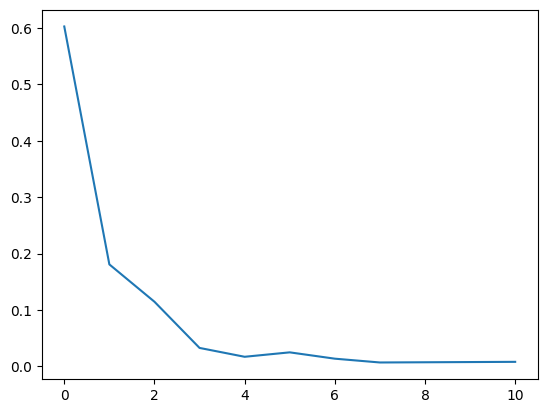

In [ ]:
plt.plot(fp) #comando plot serve para criar gráficos de linhas

In [ ]:
grafico = fp.cumsum()

Text(0.5, 1.0, 'Gráfico Acumulado')

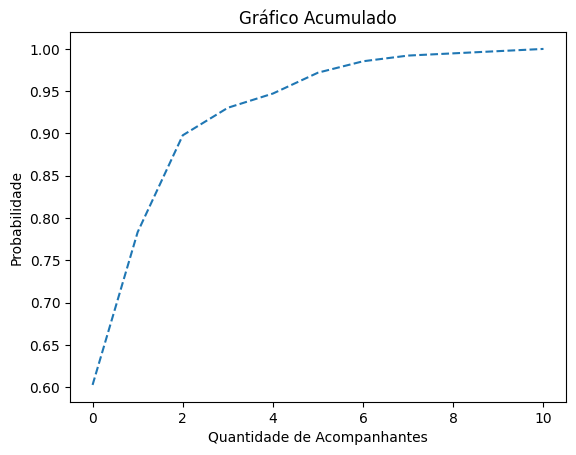

In [ ]:
plt.plot(grafico, linestyle='--') #definindo o estilo da linha como tracejada
plt.xlabel('Quantidade de Acompanhantes')
plt.ylabel('Probabilidade')
plt.title('Gráfico Acumulado')

**Covariância**

In [ ]:
titanic[['Acompanhado', 'Survived']].cov()

,Acompanhado,Survived
Acompanhado,2.603248,0.013063
Survived,0.013063,0.236772


**Correlação**

In [ ]:
titanic[['Acompanhado', 'Survived']].corr()

,Acompanhado,Survived
Acompanhado,1.000000,0.016639
Survived,0.016639,1.000000


**Tratamento dos dados**

Exibir algumas informações e iniciar o tratamento com os dados originais


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Acompanhado  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
#Remover algumas colunas para organizar meu dataset
titanic.drop(['PassengerId','Name','Ticket','Cabin','Acompanhado'], axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

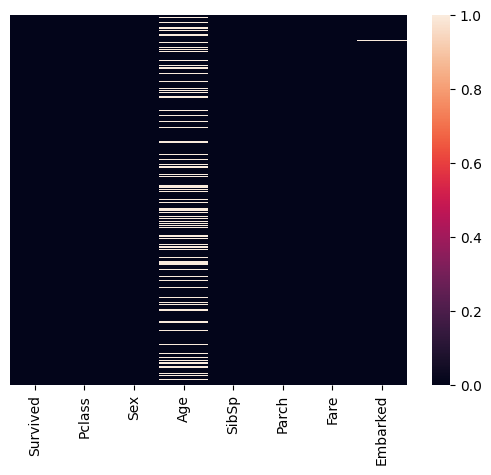

In [ ]:
#Importar a lib seaborn para observações estatísticas
import seaborn as sns

sns.heatmap(titanic.isnull(), yticklabels = False)

In [ ]:
#Completar os valores null com a mediana das idades por classe.
titanic.loc[titanic.Age.isna() & (titanic.Pclass==1), 'Age'] = titanic[titanic.Pclass==1].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass==2), 'Age'] = titanic[titanic.Pclass==2].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass==3), 'Age'] = titanic[titanic.Pclass==3].Age.median()

<Axes: >

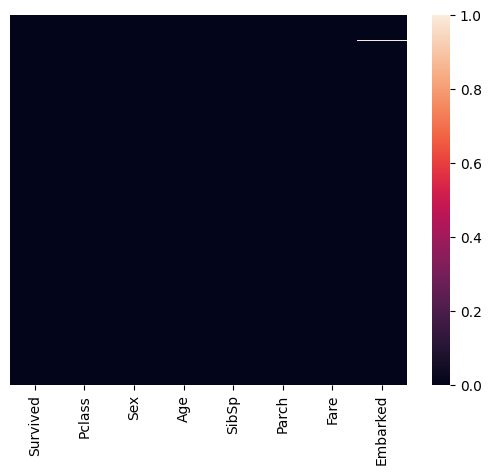

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels = False)

In [ ]:
sum(titanic.Embarked.isna())

2

In [ ]:
#Eliminar as faltantes de Emabarked
titanic.dropna(inplace=True)

In [ ]:
subset = titanic[['Pclass', 'Survived']] #criando um subconjunto


In [ ]:
matriz_rel = subset.corr() #definindo a matriz de correlação

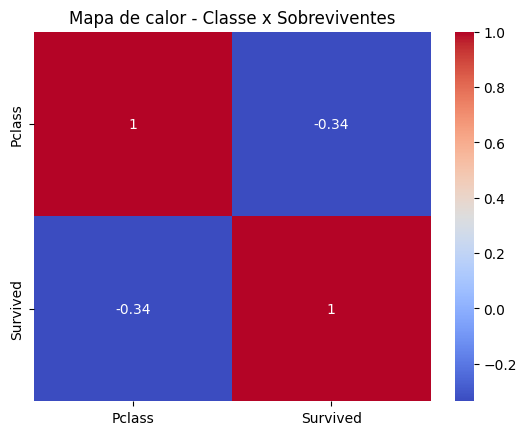

In [ ]:
sns.heatmap(matriz_rel, annot = True, cmap = 'coolwarm') #coolwarm é útil para definir cores em mapas de calor (azul e vermelho) #annot serve para fazer dados importantes/informações serem expostas no gráfico
plt.title('Mapa de calor - Classe x Sobreviventes')
plt.show()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Q         889 non-null    bool   
 7   S         889 non-null    bool   
 8   male      889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


<Axes: >

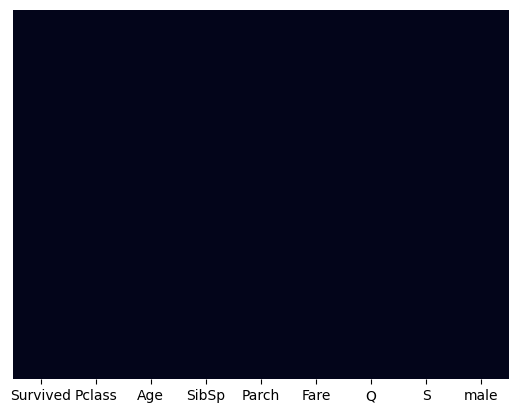

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder #label encoder é uma técnica para atribuir valor numérico a variáves categóricas
import pandas as pd

# Exemplo de dados categóricos
df = pd.DataFrame({'Embarked': ['C', 'Q', 'S']})

# Inicialize o LabelEncoder
encoder = LabelEncoder()

# Ajuste e transforme os dados
df['Embarked_encoded'] = encoder.fit_transform(df['Embarked'])

print(df)

  Embarked  Embarked_encoded
0        C                 0
1        Q                 1
2        S                 2


In [ ]:
#Converter os valores literais em numéricos (Embarked)
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark

In [ ]:
#Converter os valores literais em numéricos (Sexo)
sexo = pd.get_dummies(titanic['Sex'], drop_first=True)
sexo

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Exemplo de dados categóricos
df = pd.DataFrame({'Sex': ['male', 'female']})

# Inicialize o LabelEncoder
encoder = LabelEncoder()

# Ajuste e transforme os dados
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

print(df)

      Sex  Sex_encoded
0    male            1
1  female            0


In [ ]:
#Concatenar as Colunas no Dataframe
titanic = pd.concat([titanic, embark, sexo], axis=1)

In [ ]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True


In [ ]:
titanic.drop(['Embarked','Sex'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Distribuição Normal**

In [ ]:
x = np.arange(-3, 3, 0.001) #a função arange define os limites da variável e o incremento
# Média e desvio padrão
mu = 0
sigma = 1

In [ ]:
# Função densidade de probabilidade da distribuição normal
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

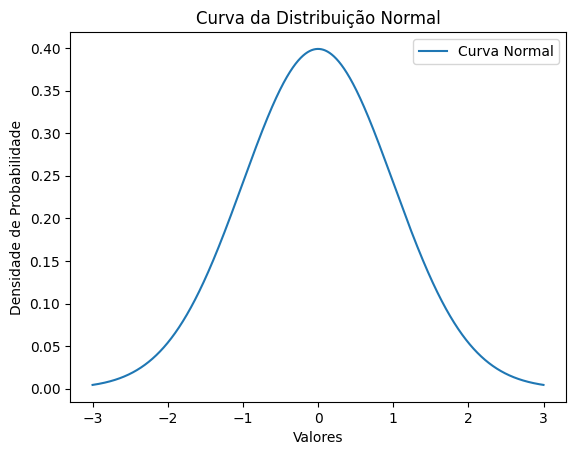

In [ ]:
# Plotando a curva normal
plt.plot(x, y, label="Curva Normal")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.title("Curva da Distribuição Normal")
plt.legend()
plt.show()

In [ ]:
#importar a bibliotaca StandardScaler para aplicar a normalização (z=(valor - média)/desvio padão)
#Média = 0 e o Variância = 1

from sklearn.preprocessing import StandardScaler #sklearn.preprocessing fornece várias funções de utilidade comuns e classes de transformadores para alterar vetores de recursos brutos em uma representação mais adequada

scaler = StandardScaler() #o módulo standard.scaler padroniza os dados
ajuste = scaler.fit(titanic) #determina a média e o desvio padrão
normal = scaler.transform(titanic) #aplicar a normal padrão z=(valor - média)/desvio padrão

normalpadrao = pd.DataFrame(normal)
normalpadrao.head()

,0,1,2,3,4,5,6,7,8
0,-0.786961,0.825209,-0.531670,0.431350,-0.474326,-0.500240,-0.307941,0.616794,0.735342
1,1.270711,-1.572211,0.680232,0.431350,-0.474326,0.788947,-0.307941,-1.621287,-1.359911
2,1.270711,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-0.307941,0.616794,-1.359911
3,1.270711,-1.572211,0.453001,0.431350,-0.474326,0.422861,-0.307941,0.616794,-1.359911
4,-0.786961,0.825209,0.453001,-0.475199,-0.474326,-0.484133,-0.307941,0.616794,0.735342


**Distribuição de Probabilidade**

In [ ]:
house = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/house.csv')

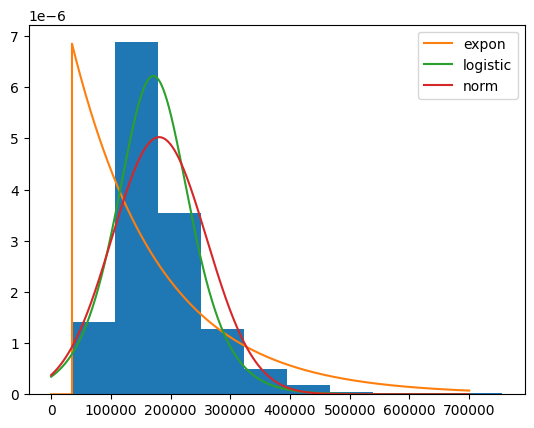

In [ ]:
import scipy #bibloteca para resolução de problemas de matemática e engenharia
import scipy.stats #módulo com grande variadade de funções
size=700000 #tamanho da escala dos eixos coordenados
x = np.arange(size) #a função arange retorna uma matriz de valores igualmente espaçados dentro do intervalo especificado
y = house['SalePrice'].values
h = plt.hist(y, density=True) #chamando a função histograma, o histograma aqui é unidimensional em y e density = True normaliza os dados

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:  #o comando for _ in cria um laço
  dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
  params = dist.fit(y)
  arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
  loc = params[-2] #localiza o penúltimo elemento
  scale = params[-1] #localiza o último elemento
  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

**Estatística Descritiva - Gráficos**

In [ ]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
import plotly.express as px #plotly é uma biblioteca com gráficos exclusivos para visualização de dados
fig = px.histogram(house, x='SalePrice', marginal = 'rug') #função histograma e o comando marginal cria histogramas marginais e ocomando rug cria "marcas"
fig.show()

In [ ]:
fig2 = px.box(house, x='GarageCars', y='SalePrice') #cria o box plot e personaliza os eixos coordenados
fig2.show()

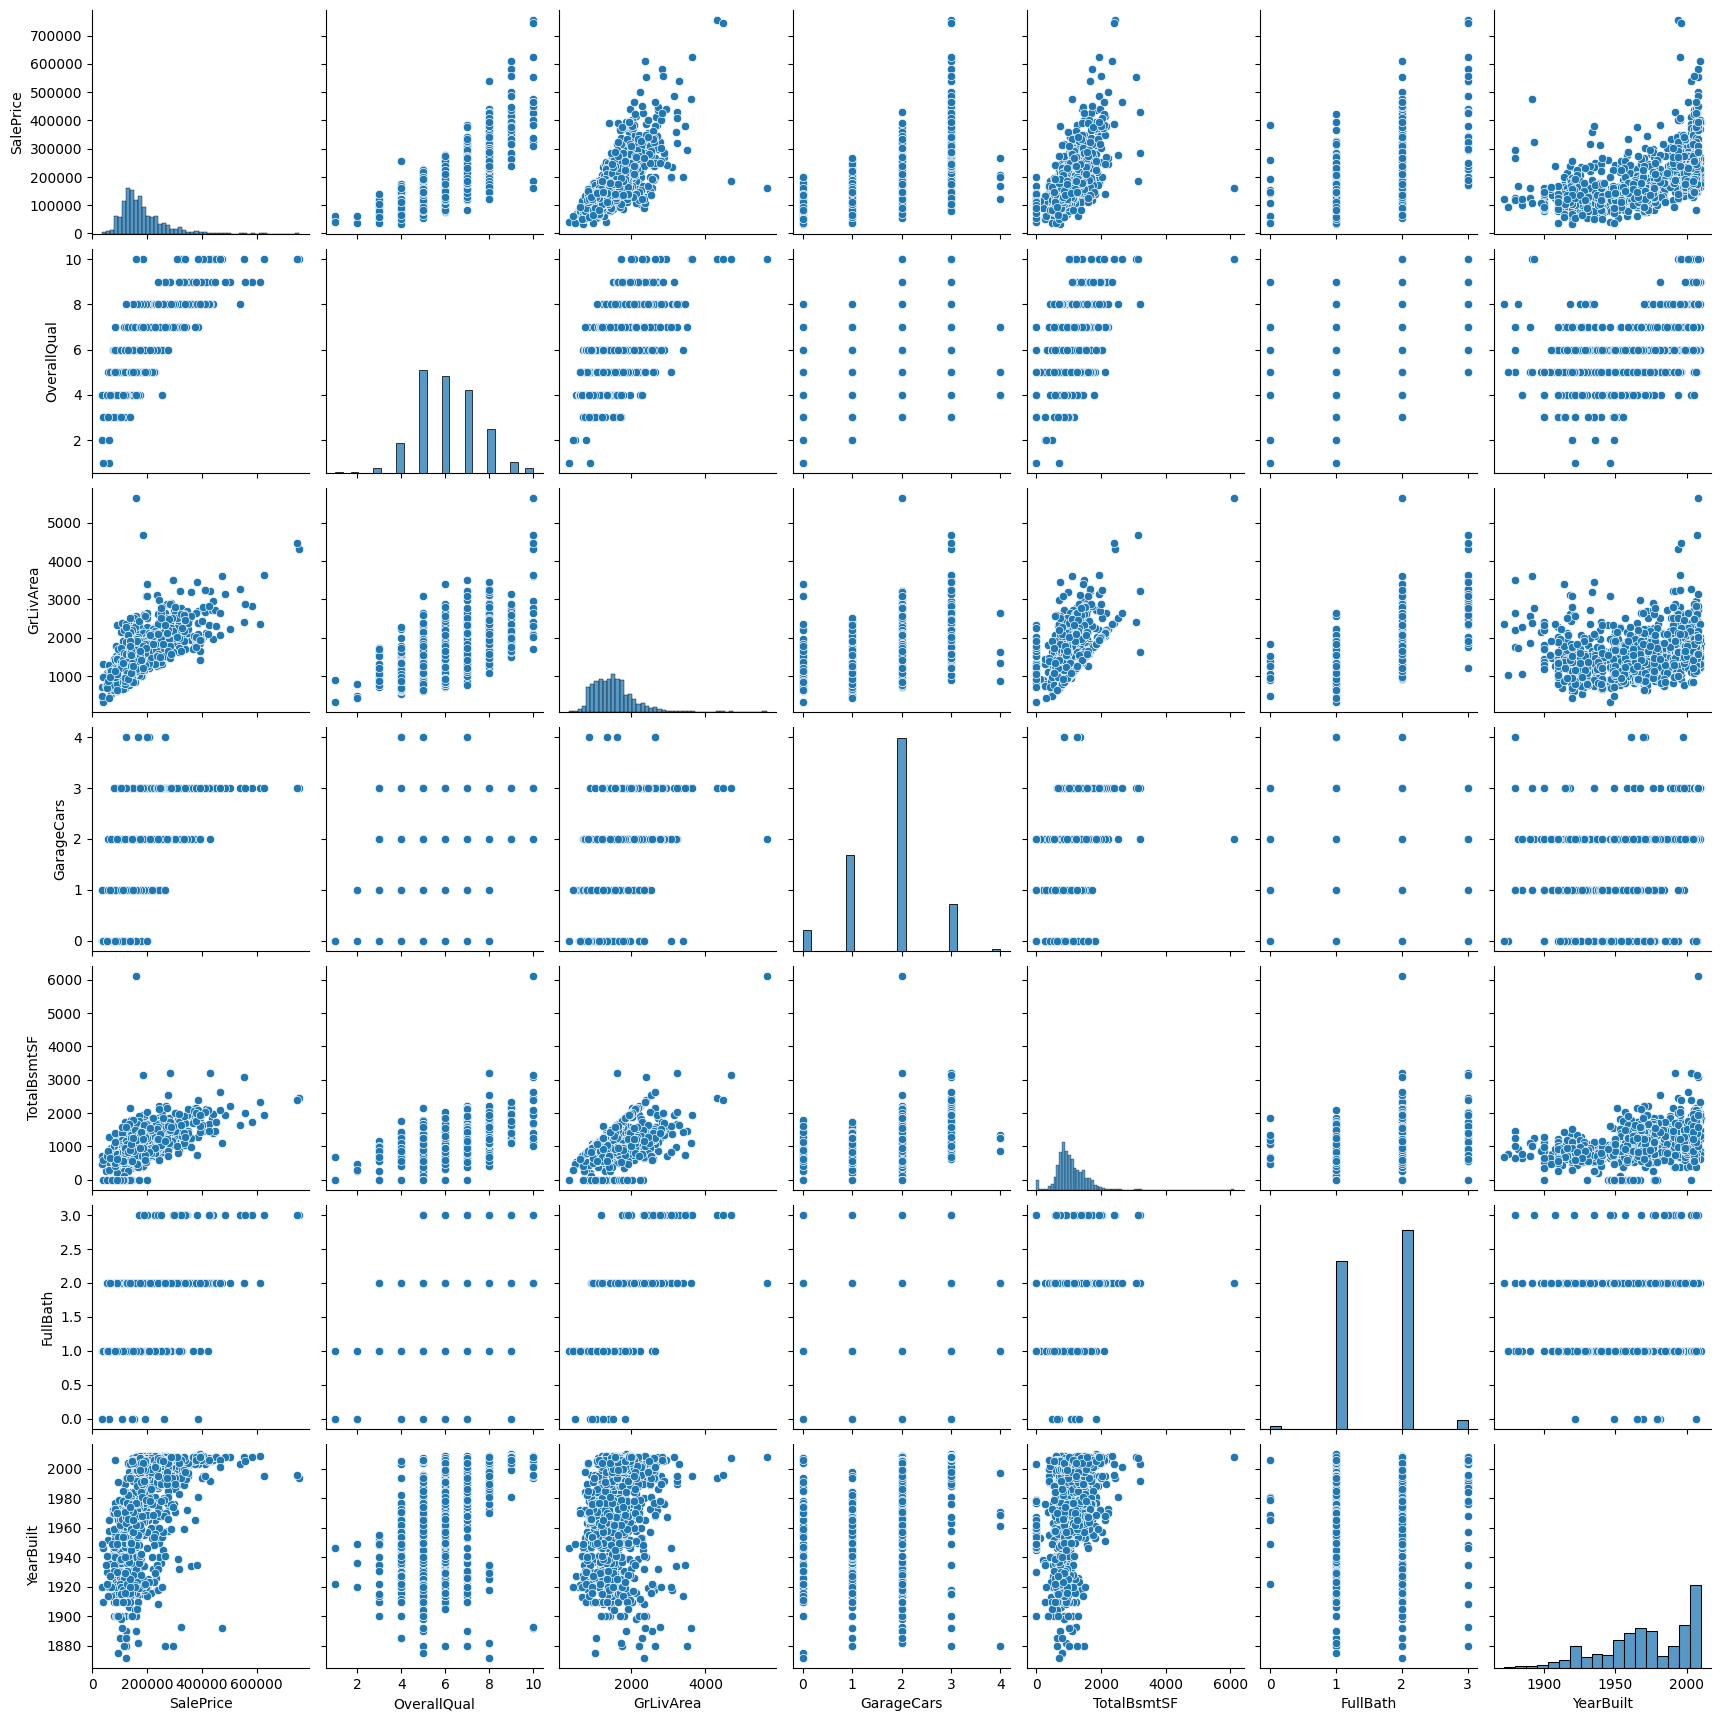

In [ ]:
import seaborn as sns
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[col]) #cria pares de gráficos

In [ ]:
house[['SalePrice', 'GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


**Distribuição Amostral**

In [ ]:
#importar as libs para trabalhar com números aleatórios
from numpy.random import seed #inicializar o gerador de números aleatórios
from numpy.random import randint #retorna um número inteiro aleatório
from numpy import mean

seed(1)

rols = randint(1,7,50)
print(rols)
print(mean(rols))

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


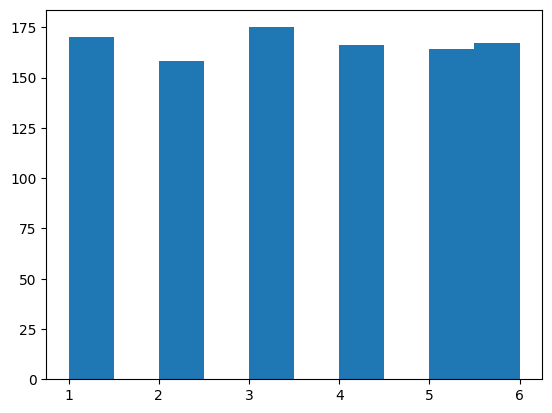

In [ ]:
from matplotlib import pyplot

means=[mean(randint(1,7,1)) for _ in range(1000)] #comando que cria um loop sobre uma sequência de elementos

pyplot.hist(means)
pyplot.show()

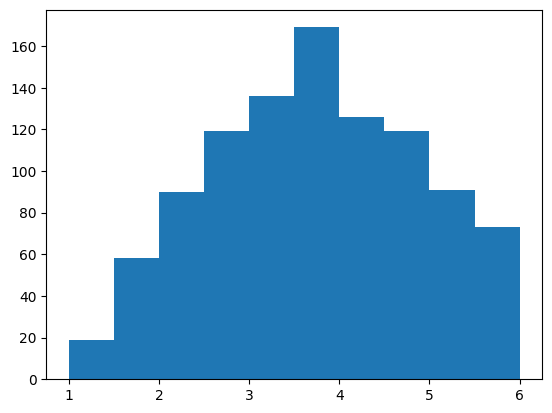

In [ ]:
means=[mean(randint(1,7,2)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

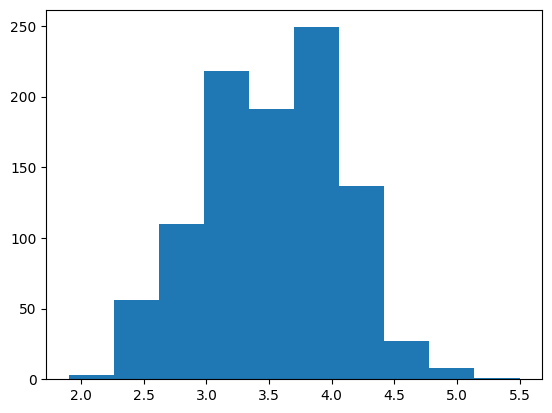

In [ ]:
means=[mean(randint(1,7,10)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

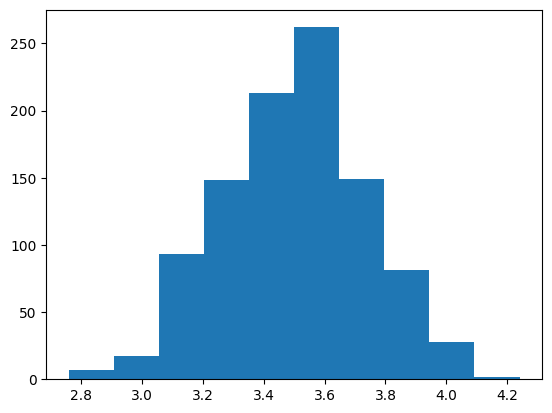

In [ ]:
means=[mean(randint(1,7,50)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

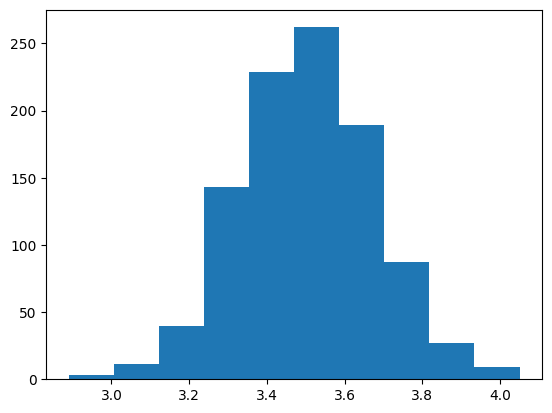

In [ ]:
means=[mean(randint(1,7,100)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

Intervalo de Confiança

In [ ]:
from scipy.stats import norm

house = df['LotFrontage'] #antes devem ser definidos quem é o df

media = house.mean()
desvio_padrao = house.std()
num = len(house)

erro_padrao = desvio_padrao / np.sqrt(num)

z_valor = norm.ppf(0.95) #comando ppf encotra o valor solicitado
margem_erro = erro_padrao * z_valor

limite_inferior = media - margem_erro
limite_superior = media + margem_erro

x_valores = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 1000)
y_valores = norm.pdf(x_valores, media, desvio_padrao)

plt.figure(figsize=(10, 5))
plt.plot(x_valores, y_valores, label='Distribuição Normal')


plt.axvline(x=limite_inferior, color='grey', linestyle='--', label=f'Limite Inferior = {limite_inferior:.2f}') #comando que adiciona linhas verticais: axvline
plt.axvline(x=limite_superior, color='grey', linestyle='--', label=f'Limite Superior = {limite_superior:.2f}')


plt.title('Distribuição Normal do Limite Total com Intervalo de Confiança de 95%')
plt.xlabel('LotFrontage')
plt.ylabel('Densidade de Probabilidade')

plt.show()